In [21]:
import kaggle
import os
import pandas as pd
import zipfile
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Download Data

In [2]:
os.makedirs("datasets", exist_ok=True)

In [4]:
# Download data
!kaggle datasets download -d shree1992/housedata -p datasets/

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown




  0%|          | 0.00/432k [00:00<?, ?B/s]
100%|██████████| 432k/432k [00:00<00:00, 9.91MB/s]


In [5]:
# Ekstrak file zip
with zipfile.ZipFile("datasets/housedata.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets/house_prices")

## 1. Mendeskripsikan data

In [6]:
df = pd.read_csv('datasets/house_prices/data.csv')

In [7]:
print('Jumlah baris dan kolom:', df.shape)

Jumlah baris dan kolom: (4600, 18)


In [8]:
print("Informasi tipe data dan skema pengkodean:")
print(df.info())

Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country   

In [10]:
print("Statistik deskriptif untuk data numerik:")
df.describe()

Statistik deskriptif untuk data numerik:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [11]:
print("Beberapa baris pertama data:")
df.head()

Beberapa baris pertama data:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
print("Jumlah nilai unik untuk setiap kolom:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Jumlah nilai unik untuk setiap kolom:
date: 70
price: 1741
bedrooms: 10
bathrooms: 26
sqft_living: 566
sqft_lot: 3113
floors: 6
waterfront: 2
view: 5
condition: 5
sqft_above: 511
sqft_basement: 207
yr_built: 115
yr_renovated: 60
street: 4525
city: 44
statezip: 77
country: 1


### Encode

In [14]:
# Encode
# Initialize encoder
le = LabelEncoder()

# Encode each column separately
for col in df.select_dtypes('object').columns:
    df[col + "_encoded"] = le.fit_transform(df[col])

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,date_encoded,street_encoded,city_encoded,statezip_encoded,country_encoded
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0,1522,36,62,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,0,3899,35,58,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0,2291,18,26,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,0,4263,3,7,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,0,4352,31,31,0


## 2. Eksplorasi Data

In [17]:
print("Lima Baris Pertama Data:")
df.head()

Lima Baris Pertama Data:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,date_encoded,street_encoded,city_encoded,statezip_encoded,country_encoded
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0,1522,36,62,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,0,3899,35,58,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0,2291,18,26,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,0,4263,3,7,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,0,4352,31,31,0


In [18]:
print("Informasi Data:")
print(df.info())

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              4600 non-null   object 
 1   price             4600 non-null   float64
 2   bedrooms          4600 non-null   float64
 3   bathrooms         4600 non-null   float64
 4   sqft_living       4600 non-null   int64  
 5   sqft_lot          4600 non-null   int64  
 6   floors            4600 non-null   float64
 7   waterfront        4600 non-null   int64  
 8   view              4600 non-null   int64  
 9   condition         4600 non-null   int64  
 10  sqft_above        4600 non-null   int64  
 11  sqft_basement     4600 non-null   int64  
 12  yr_built          4600 non-null   int64  
 13  yr_renovated      4600 non-null   int64  
 14  street            4600 non-null   object 
 15  city              4600 non-null   object 
 16  statezip          4600 non

In [19]:
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,date_encoded,street_encoded,city_encoded,statezip_encoded,country_encoded
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,36.135217,2265.385870,25.674348,38.743696,0.0
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,19.708177,1307.591795,11.982721,20.919517,0.0
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,19.000000,1132.750000,17.000000,21.000000,0.0
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,38.000000,2263.500000,32.000000,41.000000,0.0
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,53.000000,3400.250000,35.000000,56.000000,0.0
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,69.000000,4524.000000,43.000000,76.000000,0.0


In [20]:
print("Jumlah Nilai Unik Setiap Kolom:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Jumlah Nilai Unik Setiap Kolom:
date: 70
price: 1741
bedrooms: 10
bathrooms: 26
sqft_living: 566
sqft_lot: 3113
floors: 6
waterfront: 2
view: 5
condition: 5
sqft_above: 511
sqft_basement: 207
yr_built: 115
yr_renovated: 60
street: 4525
city: 44
statezip: 77
country: 1
date_encoded: 70
street_encoded: 4525
city_encoded: 44
statezip_encoded: 77
country_encoded: 1


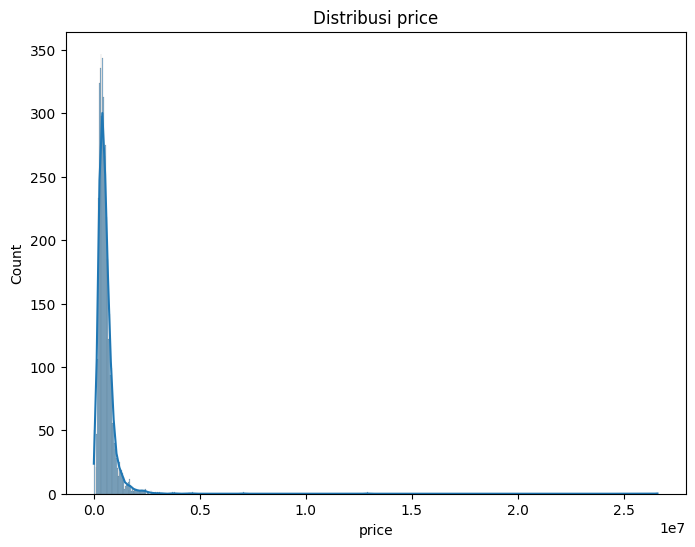

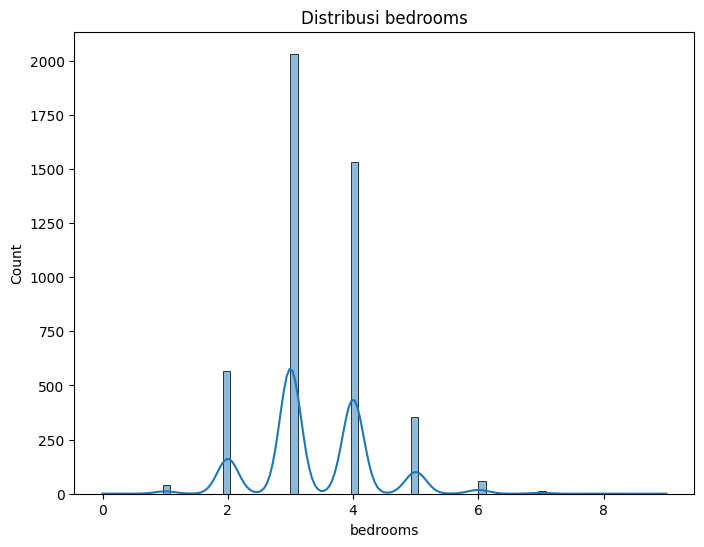

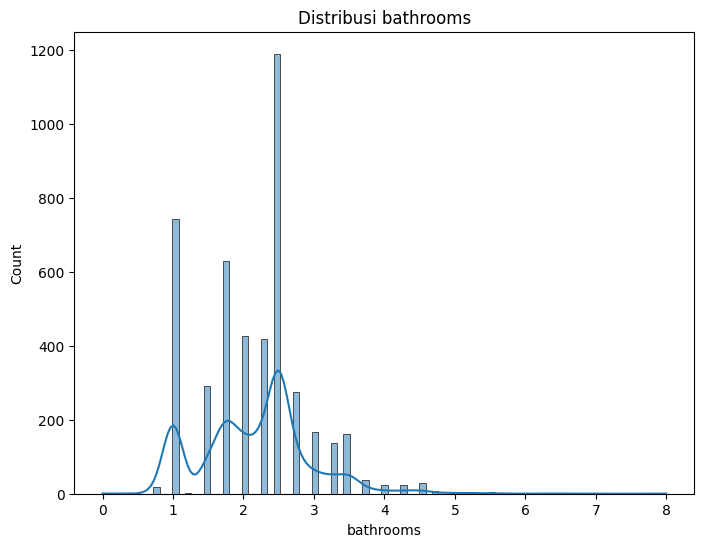

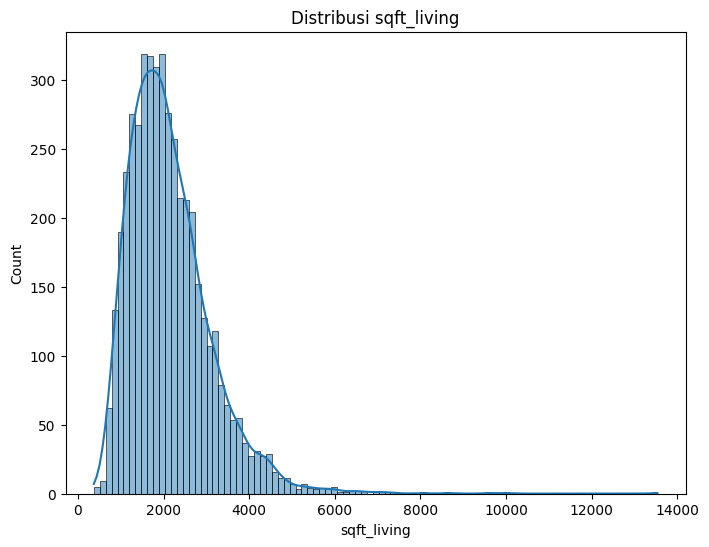

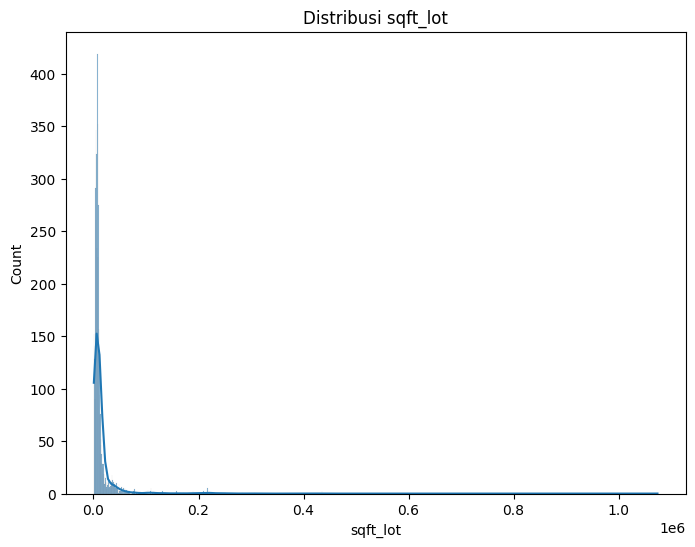

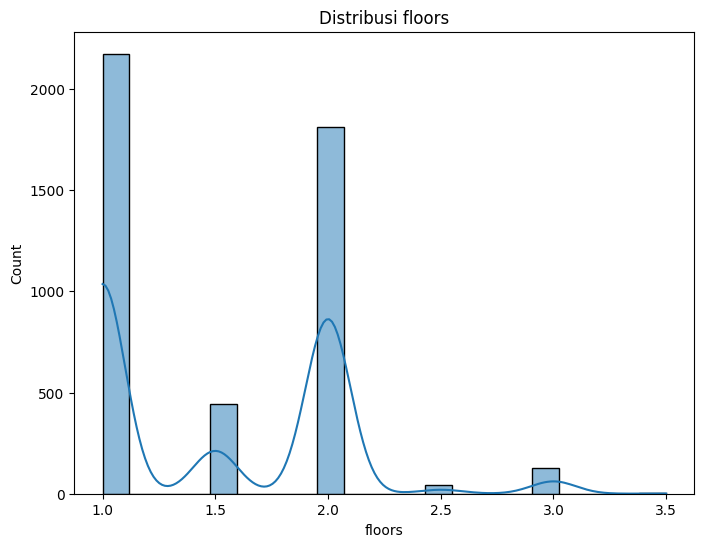

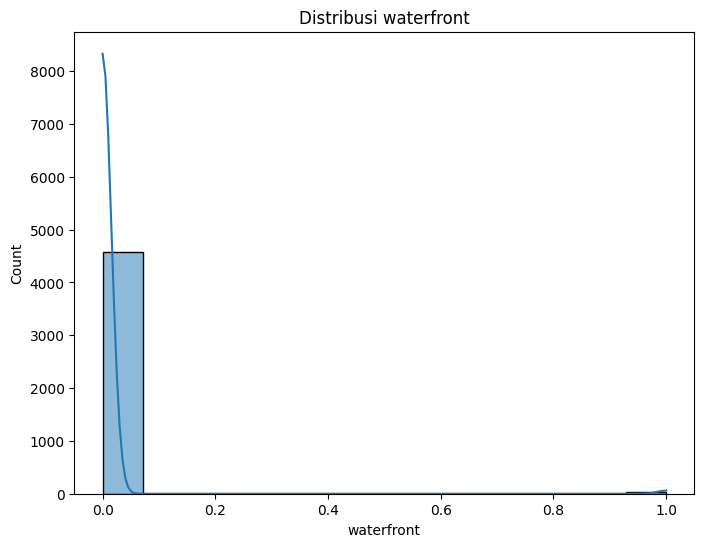

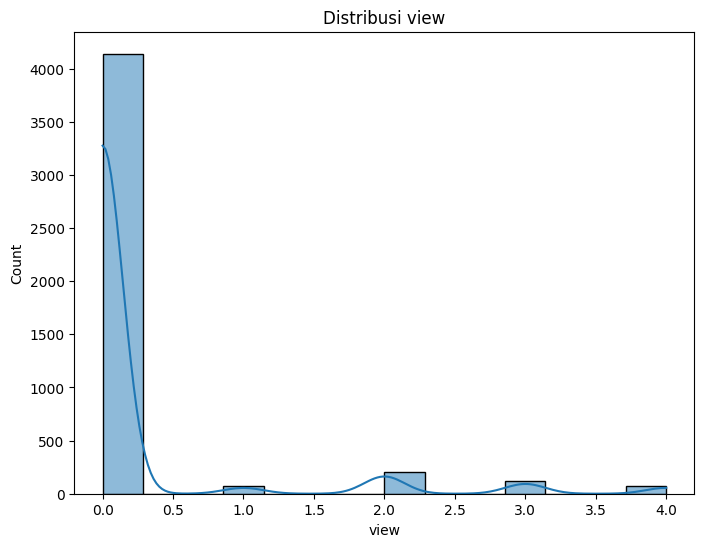

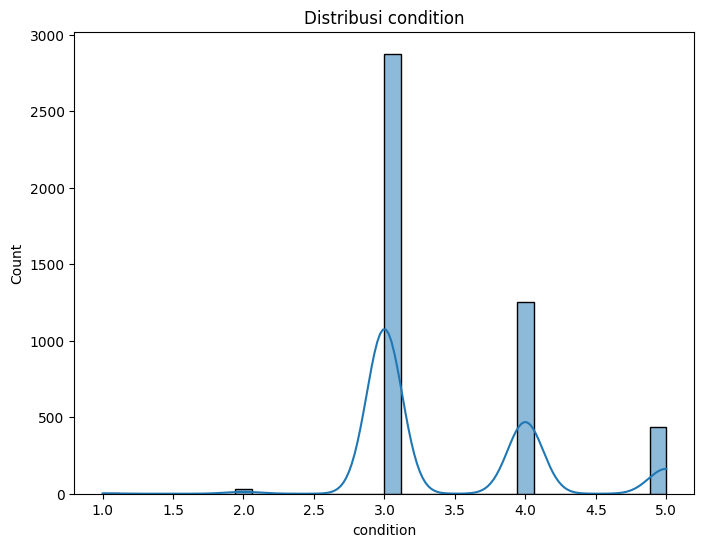

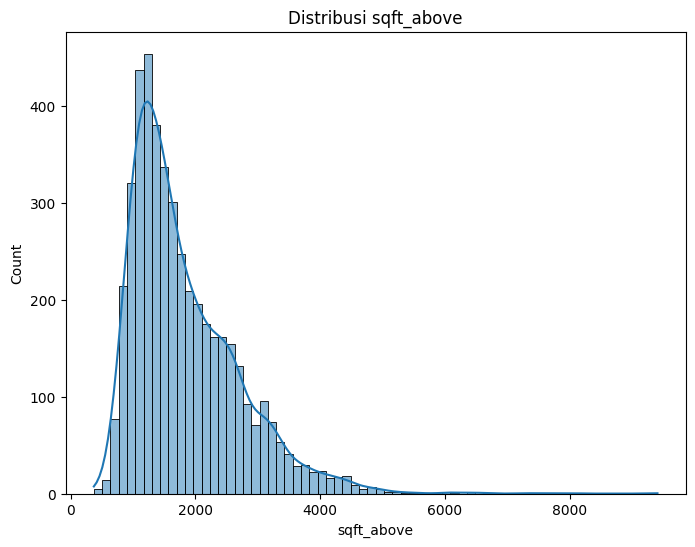

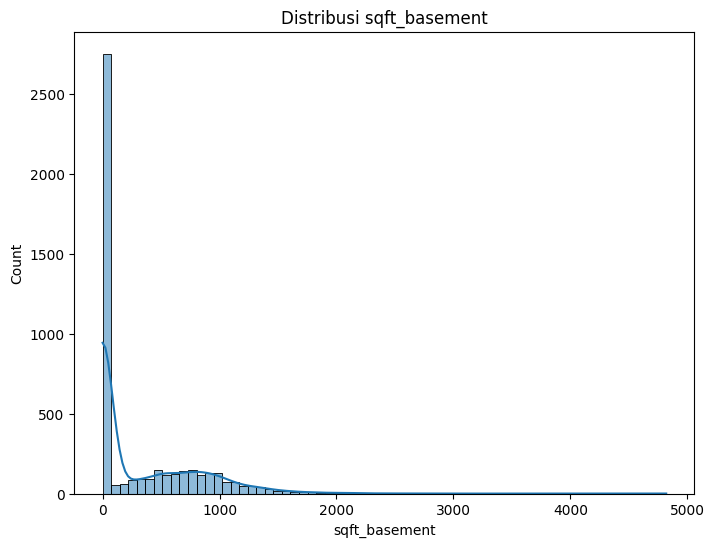

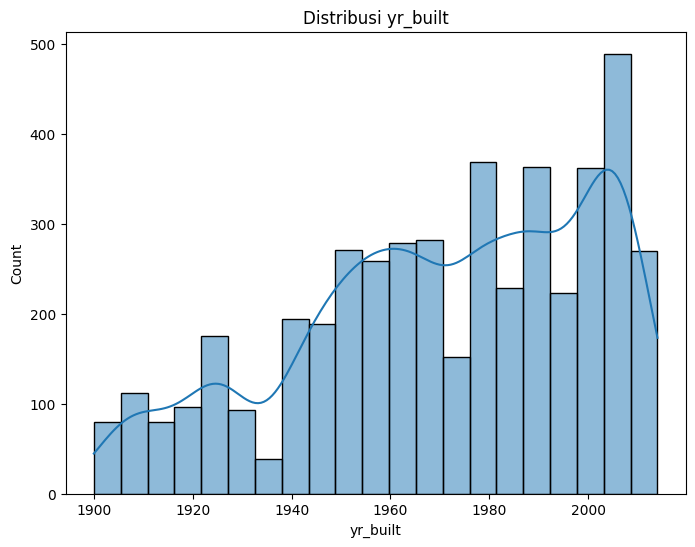

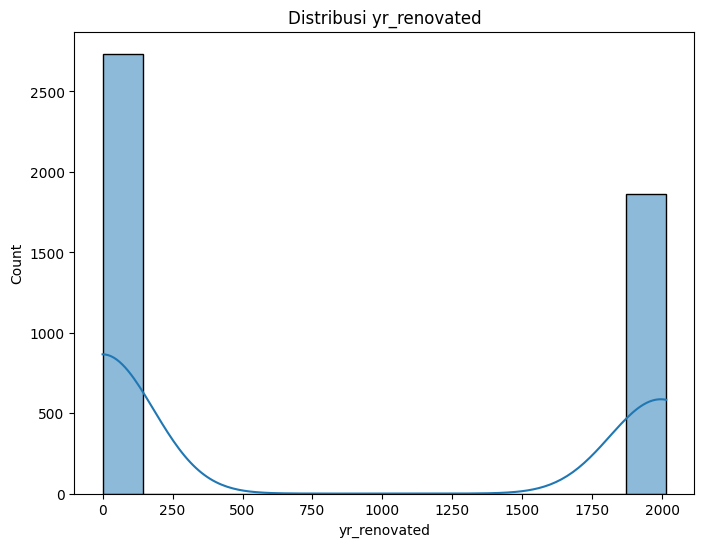

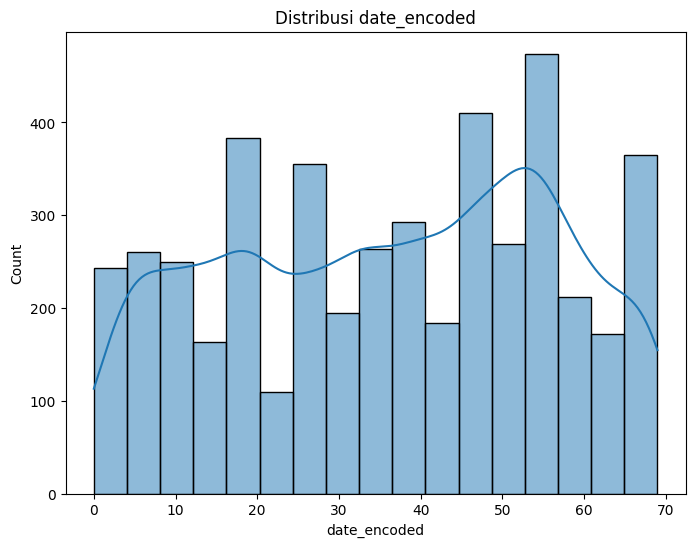

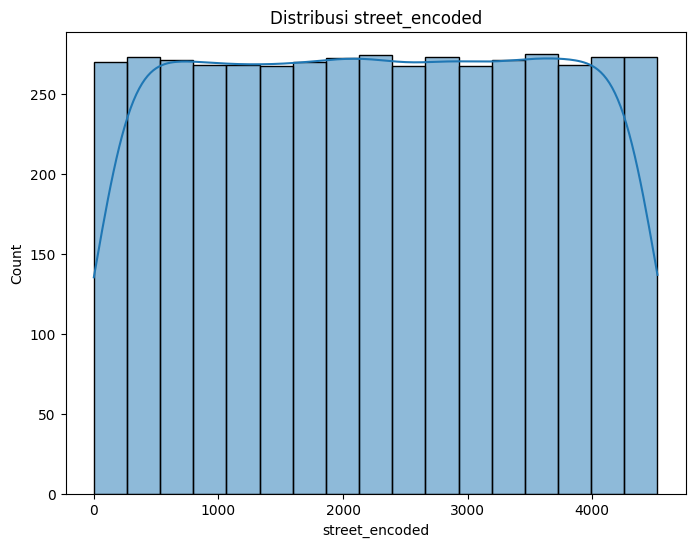

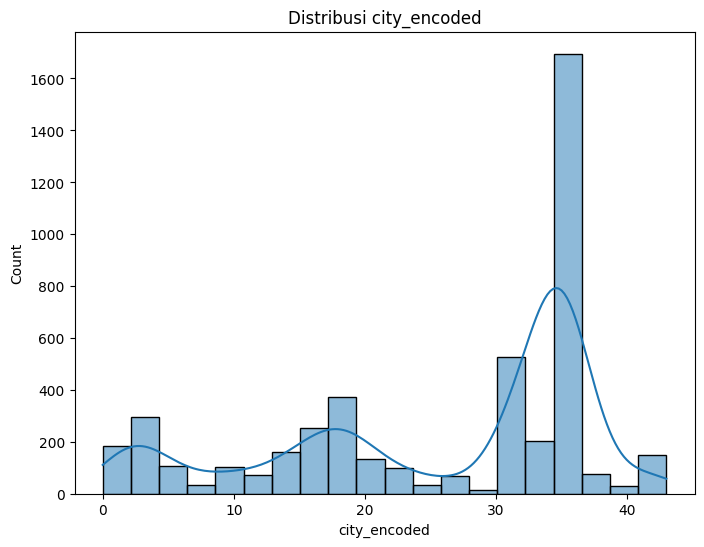

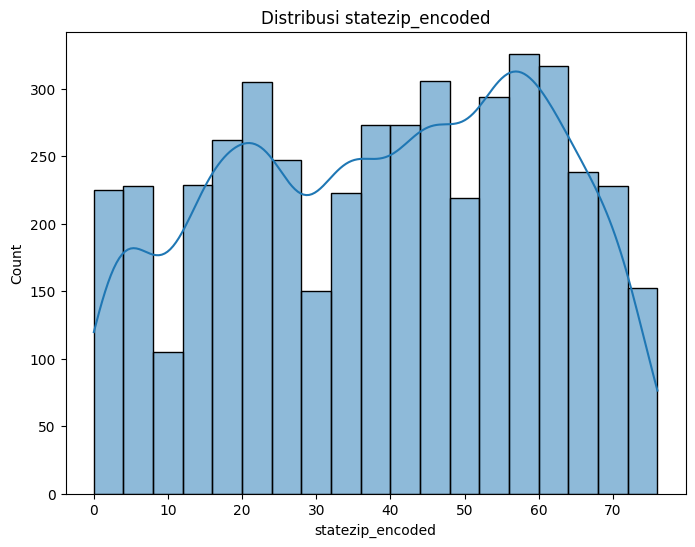

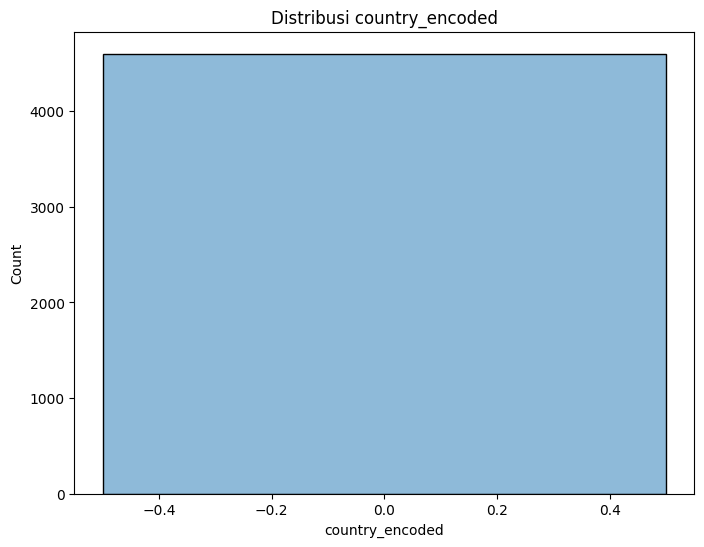

In [22]:
numerical_features = df.select_dtypes(include=['number']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.show()

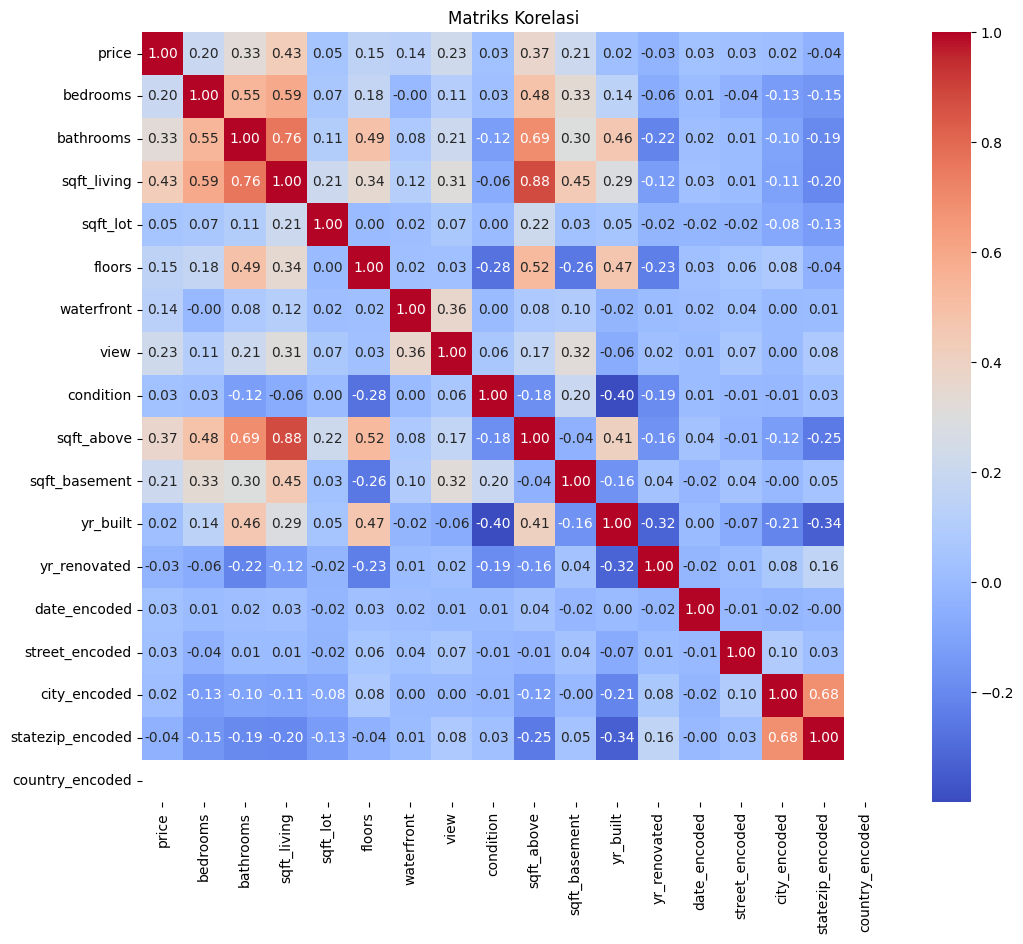

In [24]:
correlation_matrix = df.select_dtypes(['int', 'float']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


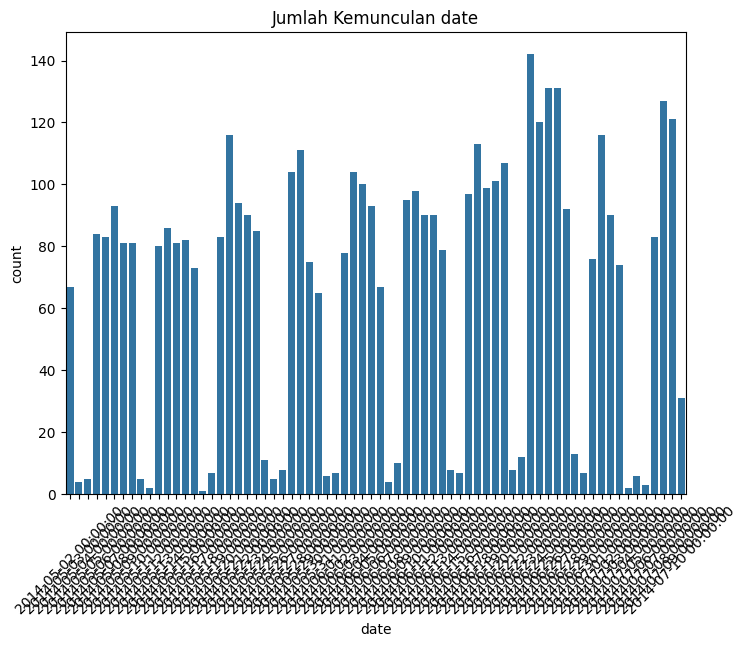

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


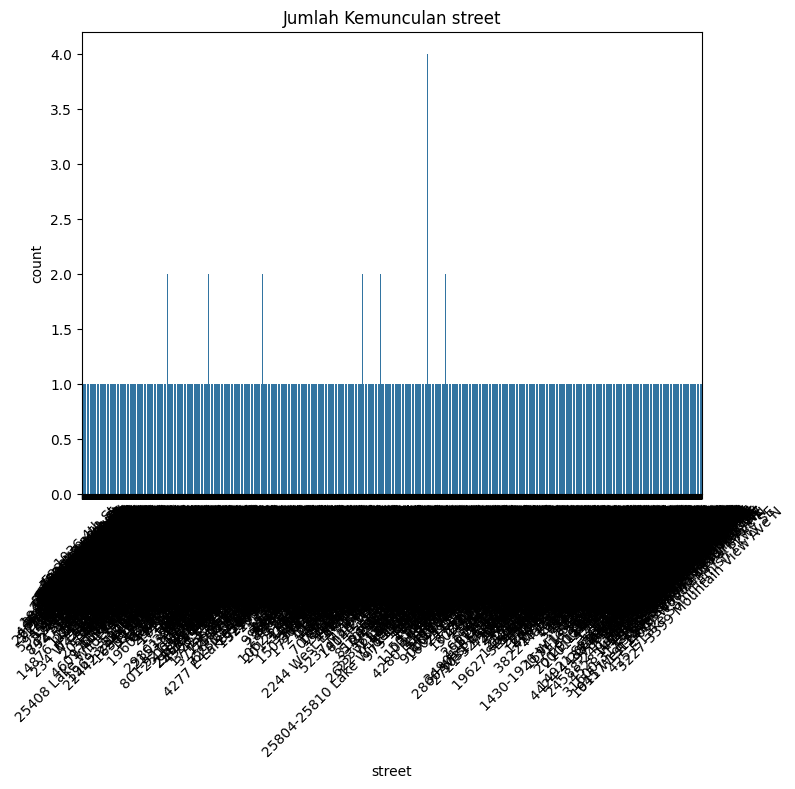

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


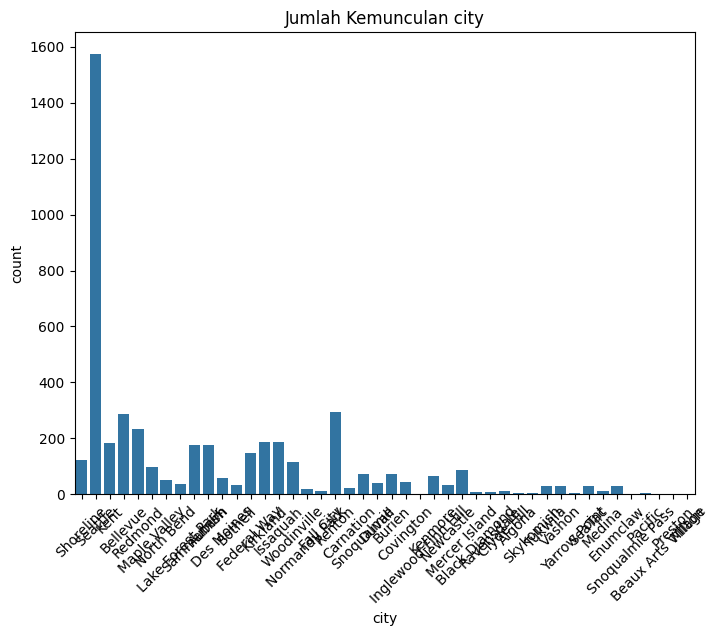

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


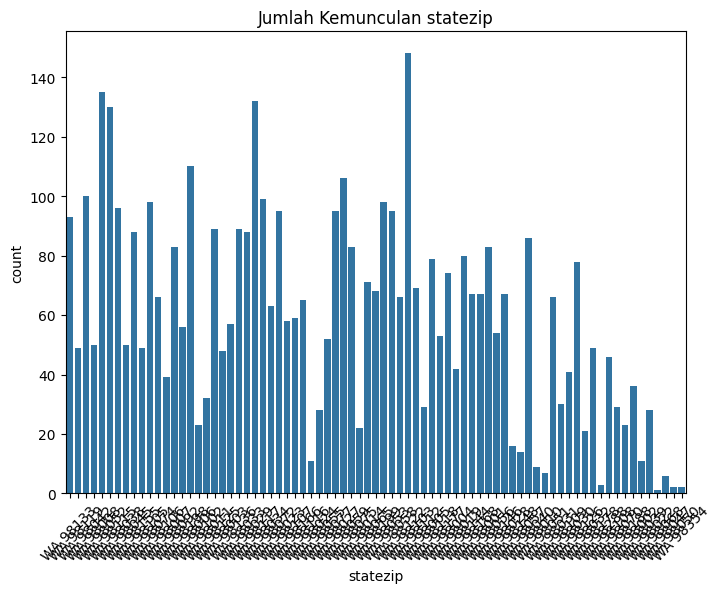

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


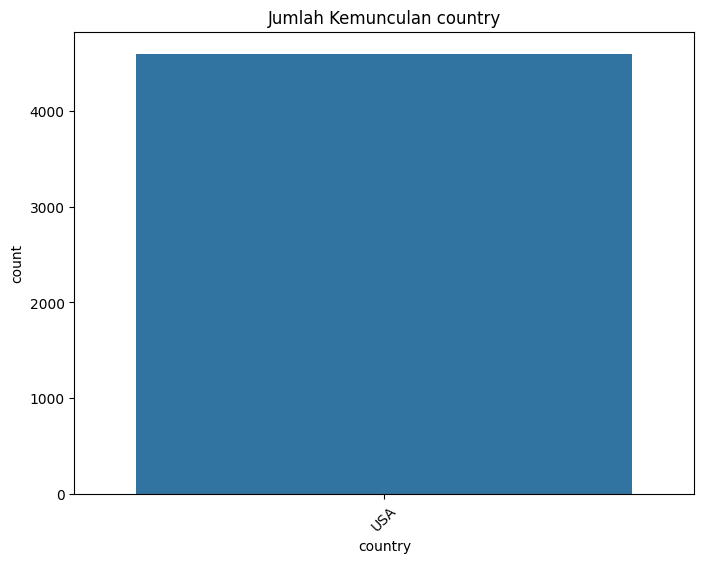

In [25]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Jumlah Kemunculan {feature}")
    plt.xticks(rotation=45)
    plt.show()

In [27]:
missing_values = df.isnull().sum()
print("Jumlah Nilai Hilang Setiap Kolom:")
print(missing_values)

Jumlah Nilai Hilang Setiap Kolom:
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
street              0
city                0
statezip            0
country             0
date_encoded        0
street_encoded      0
city_encoded        0
statezip_encoded    0
country_encoded     0
dtype: int64


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


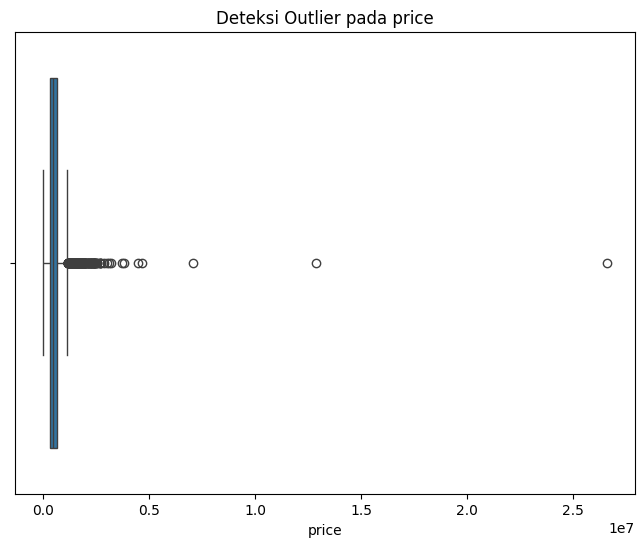

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


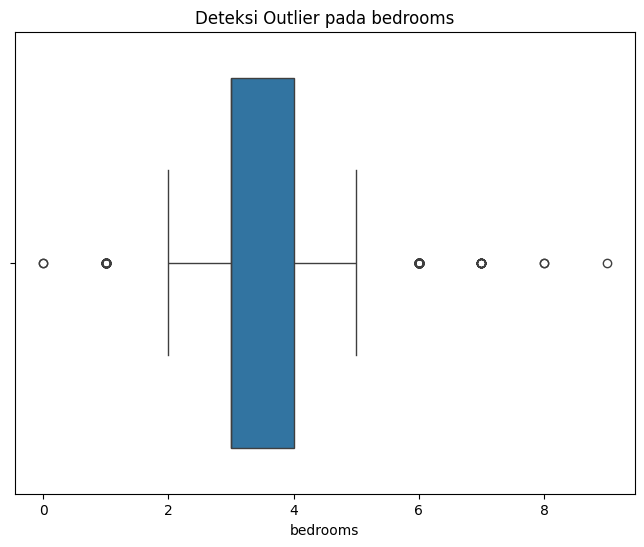

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


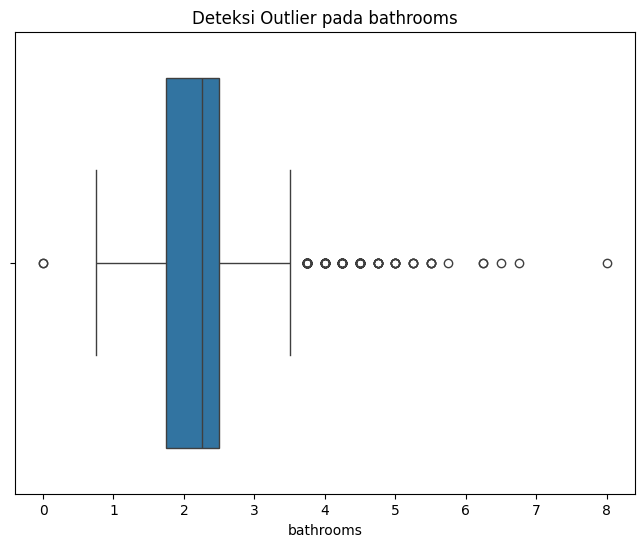

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


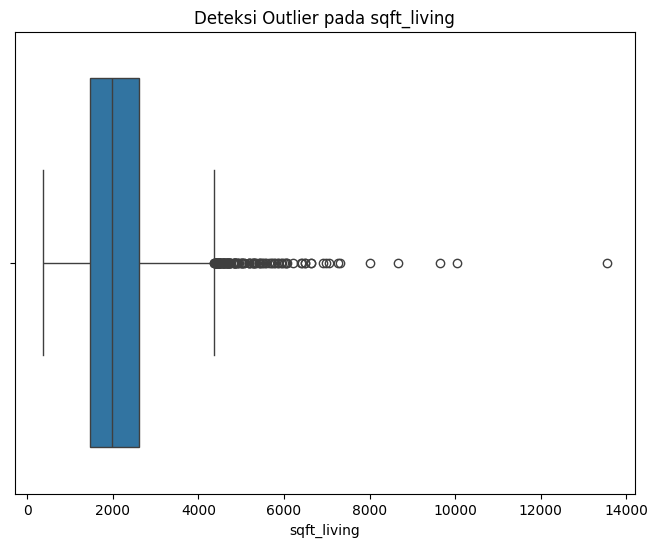

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


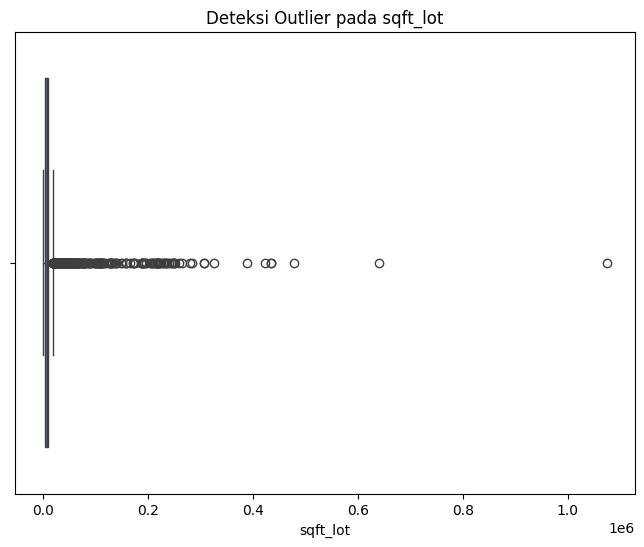

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


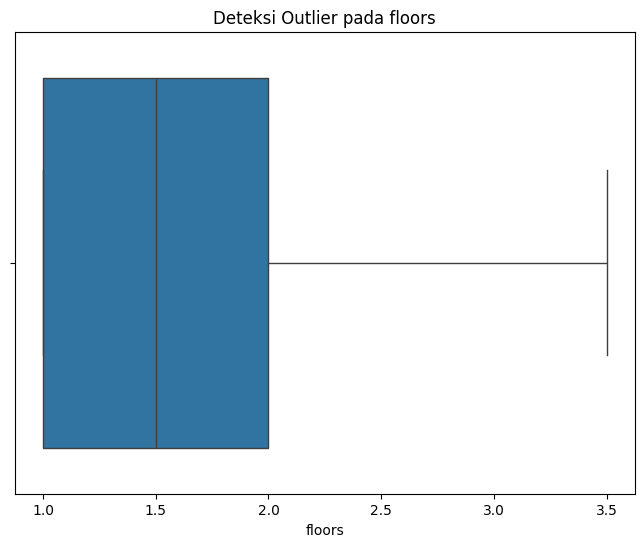

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


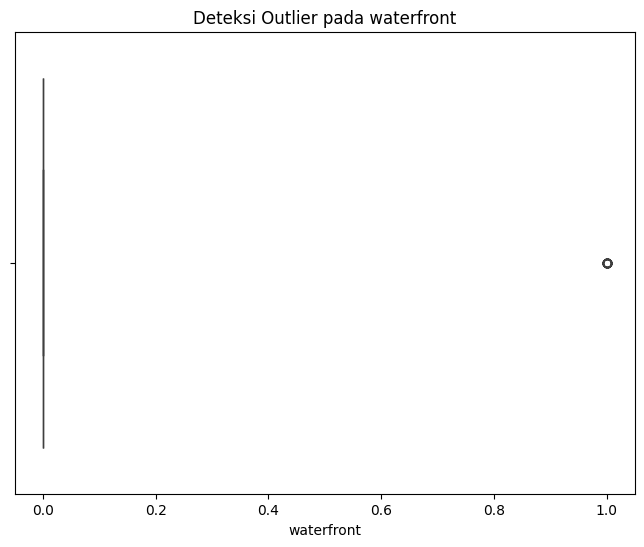

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


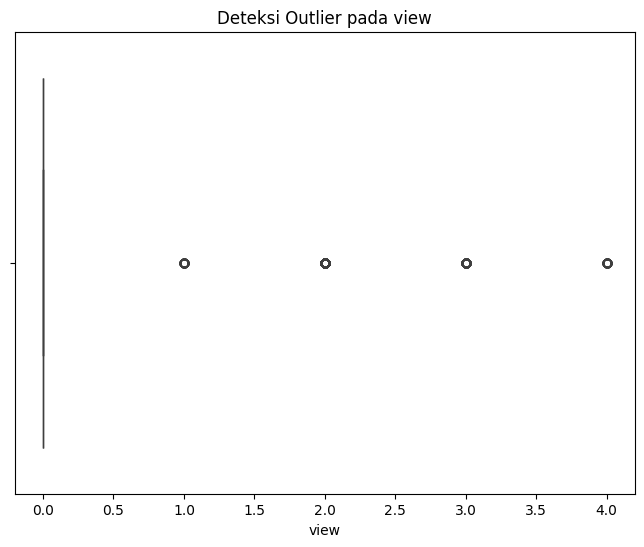

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


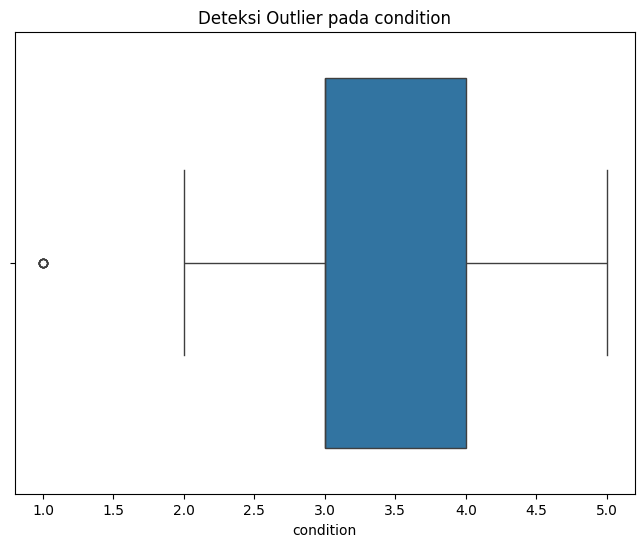

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


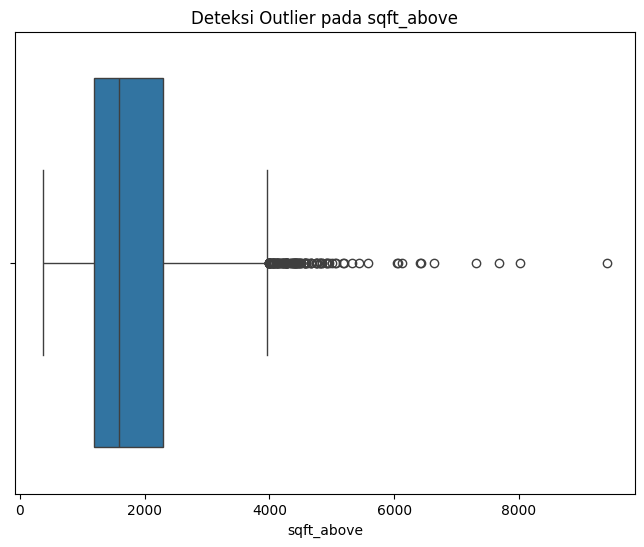

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


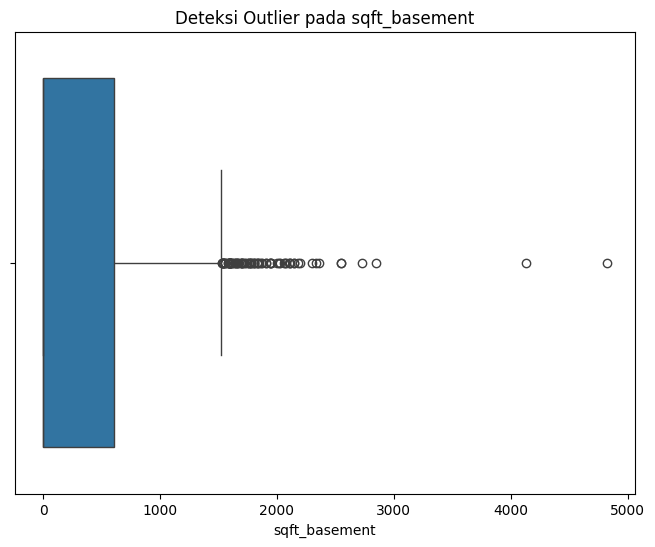

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


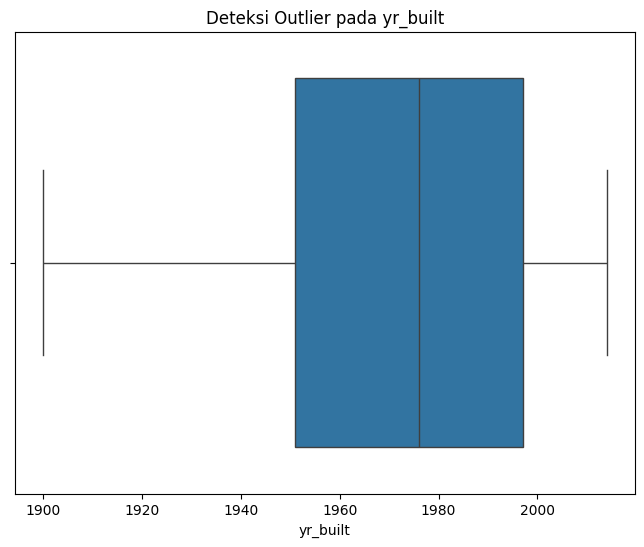

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


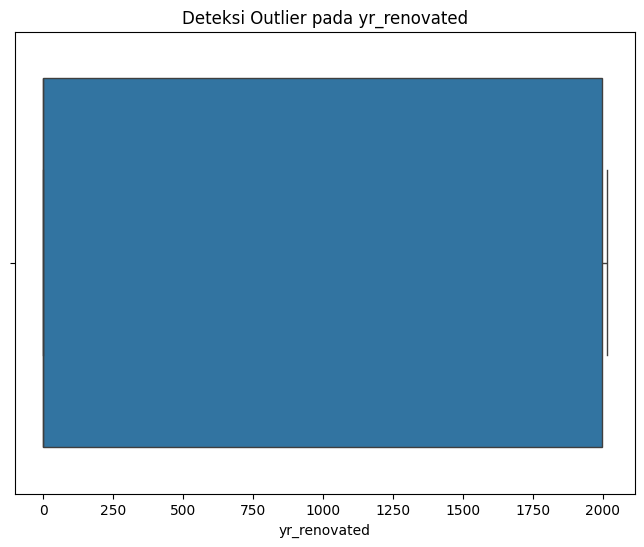

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


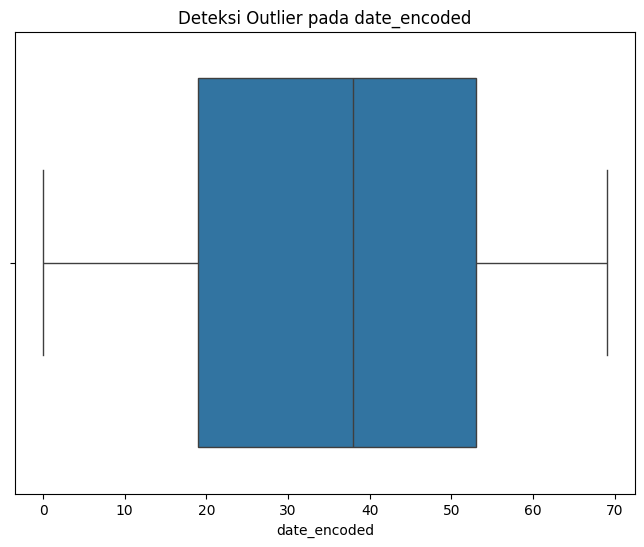

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


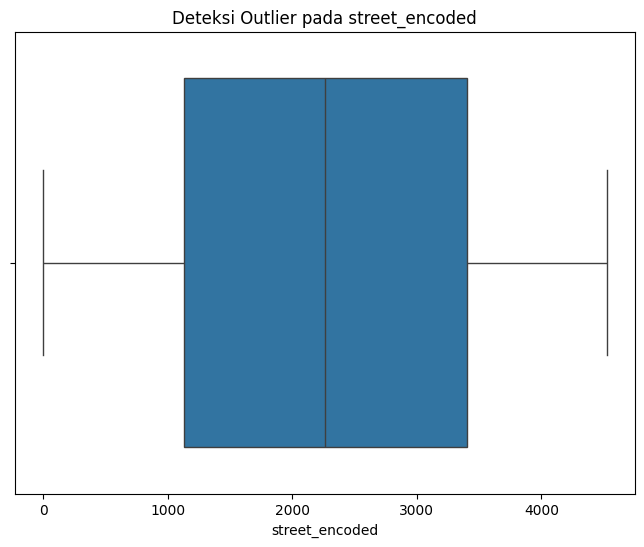

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


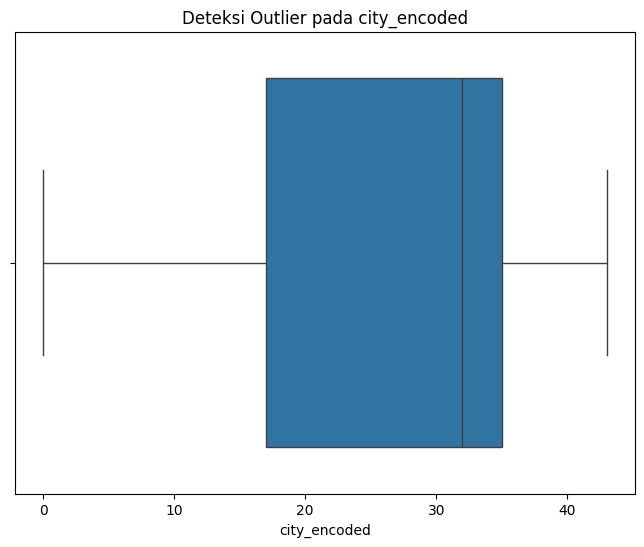

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


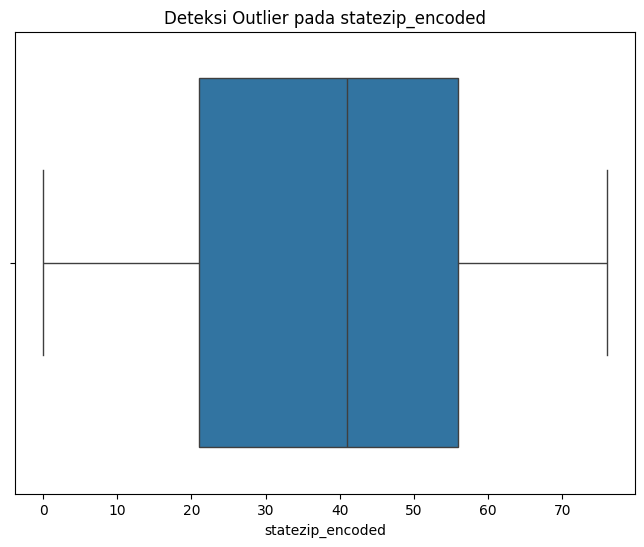

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


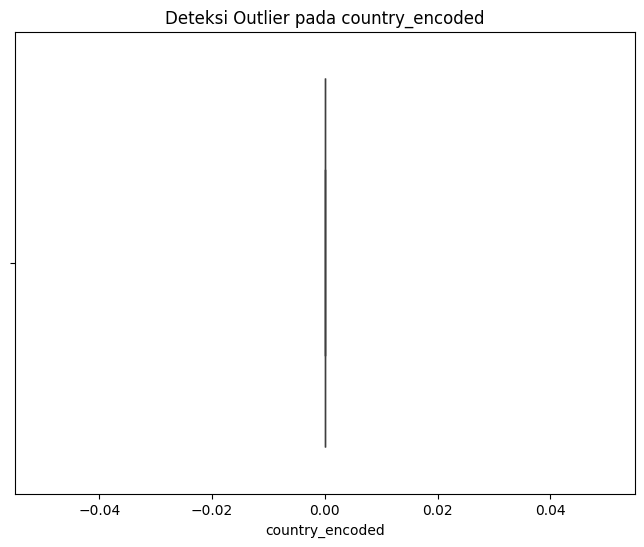

In [28]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f"Deteksi Outlier pada {feature}")
    plt.show()

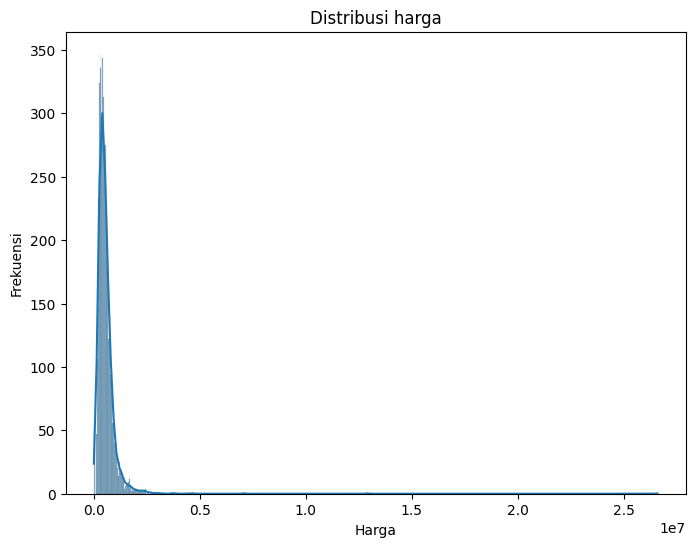

In [29]:
# Menampilkan distribusi data untuk kolom tertentu
# (misalnya, 'Price')
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribusi harga')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

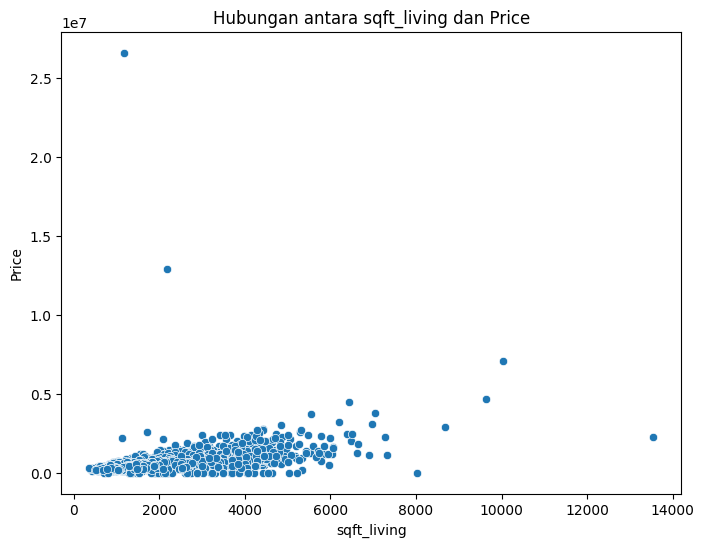

In [30]:
# Analisis hubungan antara dua variabel (misalnya, 'sqft_living' dan 'Price')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Hubungan antara sqft_living dan Price')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

## 3. Verifikasi Kualitas Data

In [33]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'date_encoded', 'street_encoded', 'city_encoded',
       'statezip_encoded', 'country_encoded'],
      dtype='object')

In [34]:
# Periksa Konsistensi Data
#   - Periksa apakah nilai dalam kolom tertentu sesuai dengan batasan yang diharapkan.
for i in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']:
    print(f"Validasi {i}:")
    if df[i].min() < 0:
        print(f"Terdapat nilai {i} negatif, perlu diperiksa lebih lanjut.")
    else:
        print(f"Nilai {i} valid.")

Validasi bedrooms:
Nilai bedrooms valid.
Validasi bathrooms:
Nilai bathrooms valid.
Validasi sqft_living:
Nilai sqft_living valid.
Validasi sqft_lot:
Nilai sqft_lot valid.
Validasi floors:
Nilai floors valid.
Validasi sqft_above:
Nilai sqft_above valid.
Validasi sqft_basement:
Nilai sqft_basement valid.


In [32]:
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Terdapat {duplicate_rows} baris data duplikat.")
    data = df.drop_duplicates()
else:
    print("Tidak ada baris data duplikat.")

Tidak ada baris data duplikat.
